# Medical Appointment No Shows Capstone

## 3. EXPLORATORY DATA ANALYSIS

#####  Developing a deeper understanding of the model development data set and preparing to develop a solid model.

In [1]:
import os
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
path = 'data/step2_output.csv'
df = pd.read_csv(path, index_col=None)

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSSent,NoShow
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientId,110517.0,1.474886e+14,2.560841e+14,39217.0,4.172457e+12,3.172848e+13,9.438963e+13,9.999816e+14
AppointmentID,110517.0,5.675305e+06,7.129559e+04,5030230.0,5.640286e+06,5.680571e+06,5.725523e+06,5.790484e+06
Age,110517.0,3.708420e+01,2.310325e+01,0.0,1.800000e+01,3.700000e+01,5.500000e+01,1.000000e+02
Scholarship,110517.0,9.827447e-02,2.976868e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Hypertension,110517.0,1.972547e-01,3.979280e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Diabetes,110517.0,7.187130e-02,2.582759e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Alcoholism,110517.0,3.040256e-02,1.716931e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Handicap,110517.0,2.221378e-02,1.614428e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
SMSSent,110517.0,3.210456e-01,4.668804e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


####  DATA PROFILES — PLOTS AND TABLES

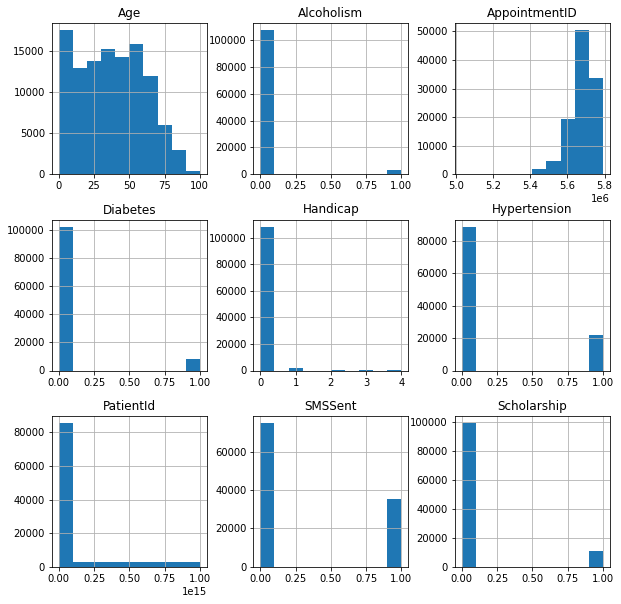

In [5]:
hist = df.hist(bins = 10, figsize = (10,10))

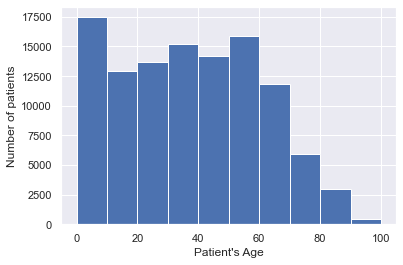

In [6]:
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
sns.set()
_= plt.hist(df['Age'], bins=bin_edges)
_= plt.xlabel('Patient\'s Age')
_= plt.ylabel('Number of patients')
plt.show()

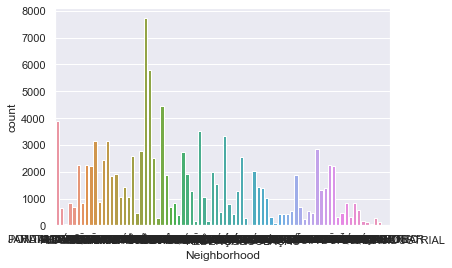

In [7]:
#select categorical variables only
df_cat = df.select_dtypes(include = 'object').copy()
#get counts of each variable value
df_cat.Neighborhood.value_counts()
#count plot for one variable
sns.countplot(data = df_cat, x = 'Neighborhood')

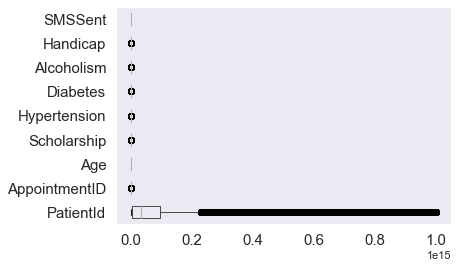

In [8]:
#create a boxplot for every column in df
boxplot = df.boxplot(grid=False, vert=False,fontsize=15)

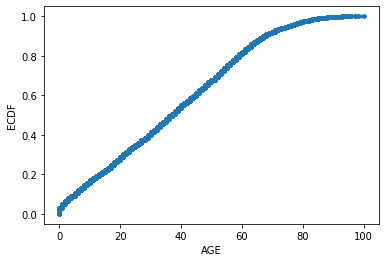

In [4]:
def ecdf(data):

    n = len(data)
    x = np.sort(data)
    y = np.arange(1,n+1)/n
    
    return x,y

b = df['Age']

xa, ye = ecdf(b)

# Generate plot
_= plt.plot(xa, ye, marker='.', linestyle='none')

# Label the axes
_= plt.ylabel('ECDF')
_= plt.xlabel('AGE')


# Display the plot
plt.show()

In [ ]:
# Create bee swarm plot with Seaborn's default settings
sns.swarmplot(x='Age', y='NoShow', data=df)

_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

# Show the plot
plt.show()


In [ ]:
percentiles = np.array([2.5, 25, 50, 75, 97.5])
np.percentile(df['Age'],percentiles)

In [ ]:
percentiles = np.array([2.5, 25, 50, 75, 97.5])

In [10]:
#sns.lmplot(x='Age', y='NoShow', data=df)

# Display the plot
#plt.show()


####  DATA RELATIONSHIPS

In [ ]:
#Ccorrelation matrix heat map
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [ ]:
#pair plots
g = sns.pairplot(df)

#### IDENTIFYING AND CREATING FEATURES